In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [9]:
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame(
    {
        "Nivel de Experiencia (NE)": np.random.choice(
            ["Bajo", "Medio", "Alto"], size=n_samples, p=[0.1, 0.3, 0.6]
        ),
        "Habilidades (H)": np.random.choice(
            ["Bajas", "Medias", "Altas"], size=n_samples, p=[0.2, 0.3, 0.5]
        ),
        "Salud (S)": np.random.choice(
            ["Baja", "Media", "Alta"], size=n_samples, p=[0.15, 0.35, 0.5]
        ),
        "Éxito de la Misión (EM)": np.random.choice(
            ["Sí", "No"], size=n_samples, p=[0.40, 0.60]
        ),
    }
)

In [10]:
# NE = Alto
data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.85, 0.15],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.75, 0.25],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.65, 0.35],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.70, 0.30],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.60, 0.40],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.50, 0.50],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.55, 0.45],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.45, 0.55],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Alto")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.35, 0.65],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Alto")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

# NE = Medio
data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.65, 0.35],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.55, 0.45],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.45, 0.55],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.50, 0.50],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.40, 0.60],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.30, 0.70],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.35, 0.65],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.25, 0.75],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Medio")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.15, 0.85],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Medio")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

# NE = Bajo
data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.40, 0.60],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.30, 0.70],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Altas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.20, 0.80],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Altas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.25, 0.75],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.15, 0.85],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Medias")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.08, 0.92],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Medias")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Alta"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.10, 0.90],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Alta")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Media"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.05, 0.95],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Media")
        ]
    ),
)

data.loc[
    (data["Nivel de Experiencia (NE)"] == "Bajo")
    & (data["Habilidades (H)"] == "Bajas")
    & (data["Salud (S)"] == "Baja"),
    "Éxito de la Misión (EM)",
] = np.random.choice(
    ["Sí", "No"],
    p=[0.02, 0.98],
    size=len(
        data[
            (data["Nivel de Experiencia (NE)"] == "Bajo")
            & (data["Habilidades (H)"] == "Bajas")
            & (data["Salud (S)"] == "Baja")
        ]
    ),
)

In [11]:
# Codificación ordinal de variables categóricas
encoder = OrdinalEncoder()

X = encoder.fit_transform(
    data[
        [
            "Nivel de Experiencia (NE)",
            "Habilidades (H)",
            "Salud (S)",
        ]
    ]
)

y = data["Éxito de la Misión (EM)"].map({"No": 0, "Sí": 1})

In [12]:
# Entrenamiento del modelo Naive Bayes categórico
model = CategoricalNB()
model.fit(X, y)

# Generar todas las combinaciones posibles
niveles = ["Bajo", "Medio", "Alto"]
habilidades = ["Bajas", "Medias", "Altas"]
salud = ["Baja", "Media", "Alta"]

combinations = pd.DataFrame(
    [[ne, h, s] for ne in niveles for h in habilidades for s in salud],
    columns=[
        "Nivel de Experiencia (NE)",
        "Habilidades (H)",
        "Salud (S)",
    ],
)

# Transformar combinaciones
X_new = encoder.transform(combinations)
# Predecir probabilidades
probs = model.predict_proba(X_new)

In [13]:
# Agregar probabilidades al DataFrame
combinations["P(EM = No)"] = probs[:, 0]
combinations["P(EM = Sí)"] = probs[:, 1]

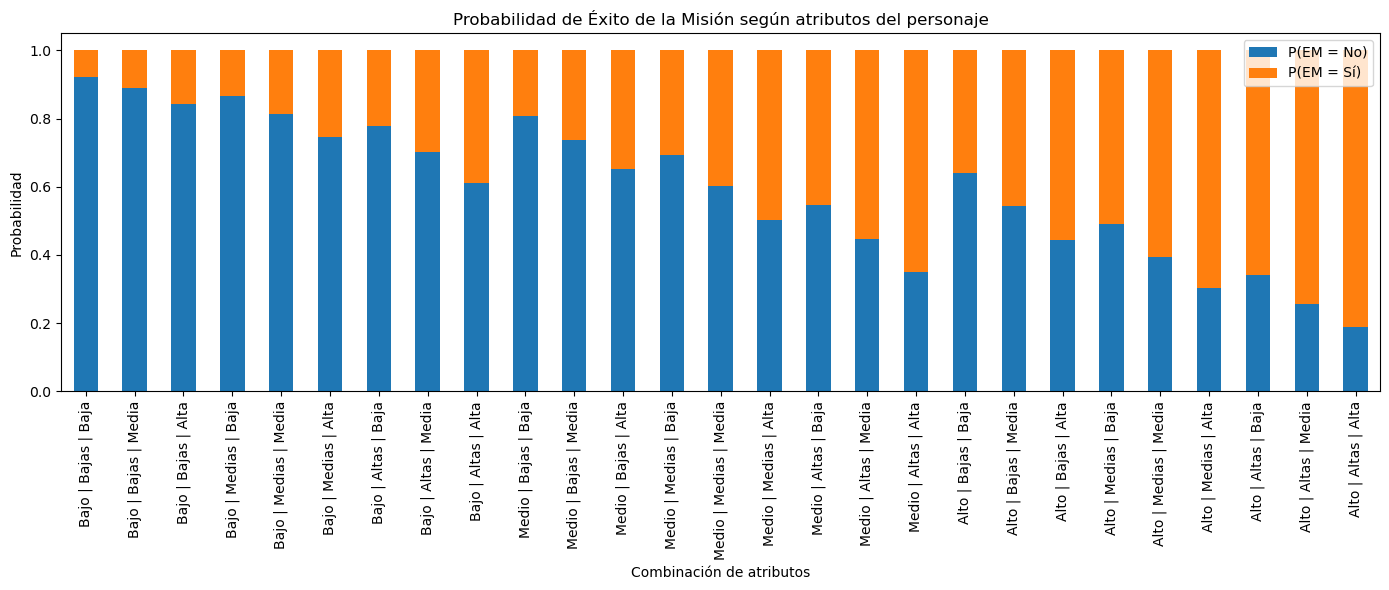

In [14]:
# Etiqueta para eje X
combinations["Etiqueta"] = combinations.apply(
    lambda row: f"{row['Nivel de Experiencia (NE)']} | {row['Habilidades (H)']} | {row['Salud (S)']}",
    axis=1,
)

# Gráfica de barras apiladas
combinations.plot(
    x="Etiqueta",
    y=["P(EM = No)", "P(EM = Sí)"],
    kind="bar",
    stacked=True,
    figsize=(14, 6),
)

plt.title("Probabilidad de Éxito de la Misión según atributos del personaje")
plt.xlabel("Combinación de atributos")
plt.ylabel("Probabilidad")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.tight_layout()

# Guardar la gráfica
plt.savefig("probabilidades_exito_mision_naive_bayes.png")
plt.show()